# Kendal correlation between levels

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Misc functions

In [2]:
def select_max_k(df):
    df.groupby(['node','s'], sort=False)['k'].max()
    idx = df.groupby(['node','s'])['k'].transform(max) == df['k']
    df_k_max = df[idx][['node','number_influenced','s']]
    return df_k_max

def generate_pivot_df(df_k_max):
    pivot_df = []

    for n in df_k_max['node'].unique():
        df_nodes = df_k_max.loc[df_k_max['node'] == n]
        df_nodes = df_nodes.set_index('node', drop=True)
        pivot_df.append(df_nodes.pivot_table(values='number_influenced',
                                             index=df_nodes.index,
                                             columns='s').reset_index(drop=True))
    df_to_corr = pd.concat(pivot_df)
    
    return df_to_corr

## Plurality

In [3]:
df = pd.read_csv('parallel_merge_plurality.csv',
                 names=['k','node','number_influenced','s'])
df.head()

,k,node,number_influenced,s
0,0,9,1,0
1,0,9,8,1
2,1,9,40,1
3,2,9,65,1
4,0,9,282,2


In [4]:
df_k_max = select_max_k(df)
df_k_max.head()

,node,number_influenced,s
0,9,1,0
3,9,65,1
6,9,508,2
13,9,6838,3
17,9,13230,4


In [5]:
df_to_corr = generate_pivot_df(df_k_max)
df_to_corr.head()

s,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,65,508,6838,13230,17638,18233,18375,18453,18468,18470.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,2,817,1710,7726,13933,17693,18267,18390,18457,18468.0,18470.0,NaN,NaN,NaN,NaN,NaN,NaN
0,1,2,817,1710,7726,13933,17693,18267,18390,18457,18468.0,18470.0,NaN,NaN,NaN,NaN,NaN,NaN
0,1,9,456,4400,10387,15892,17850,18272,18410,18461,18469.0,18470.0,NaN,NaN,NaN,NaN,NaN,NaN
0,1,2,132,673,6266,12884,17458,18233,18403,18464,18469.0,18470.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_corr_kendall = df_to_corr.corr(method='kendall')
df_corr_kendall

s,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
s,,,,,,,,,,,,,,,,,,
0,1.000000,0.257814,0.130736,0.142869,0.134578,0.136407,0.122137,0.121187,0.113951,0.108952,0.107386,0.044822,-0.011668,-0.010863,0.012752,-0.313183,0.158114,NaN
1,0.257814,1.000000,0.434817,0.592668,0.461915,0.510984,0.424719,0.431113,0.391482,0.391281,0.384981,0.295343,0.205182,0.045218,0.115193,0.018135,0.123091,NaN
2,0.130736,0.434817,1.000000,0.673069,0.746192,0.653775,0.675534,0.616642,0.606312,0.604649,0.556467,0.574548,0.392974,0.101776,-0.159093,0.195297,0.252646,NaN
3,0.142869,0.592668,0.673069,1.000000,0.726437,0.734802,0.641066,0.623007,0.565318,0.569745,0.538204,0.525611,0.515729,0.339377,-0.071932,0.183845,0.000000,NaN
4,0.134578,0.461915,0.746192,0.726437,1.000000,0.815326,0.831751,0.725438,0.701045,0.680491,0.614389,0.600728,0.503534,0.483392,0.390291,0.292278,0.284268,NaN
5,0.136407,0.510984,0.653775,0.734802,0.815326,1.000000,0.853811,0.838394,0.744991,0.735326,0.679791,0.618644,0.529719,0.470336,0.549192,0.356041,0.426401,NaN
6,0.122137,0.424719,0.675534,0.641066,0.831751,0.853811,1.000000,0.858336,0.810427,0.772343,0.702876,0.656801,0.523205,0.483492,0.459951,0.372910,0.423207,NaN
7,0.121187,0.431113,0.616642,0.623007,0.725438,0.838394,0.858336,1.000000,0.813912,0.791149,0.744715,0.662414,0.537344,0.480537,0.492962,0.369226,0.423207,NaN
8,0.113951,0.391482,0.606312,0.565318,0.701045,0.744991,0.810427,0.813912,1.000000,0.805682,0.752687,0.695505,0.519334,0.490591,0.504735,0.383386,0.352673,NaN


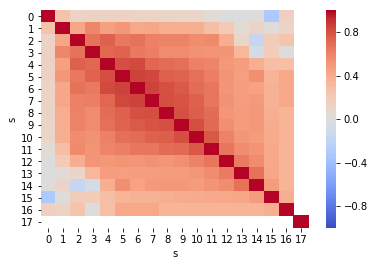

In [8]:
sns.heatmap(df_corr_kendall, 
            xticklabels=df_corr_kendall.columns.values,
            yticklabels=df_corr_kendall.columns.values,
            vmin=-1, cmap='coolwarm')

## Min

In [10]:
df = pd.read_csv('parallel_merge_min.csv',
                 names=['k','node','number_influenced','s'])
df.head()

,k,node,number_influenced,s
0,0,9,1,0
1,1,9,2,0
2,2,9,4,0
3,3,9,7,0
4,4,9,23,0


In [11]:
df_k_max = select_max_k(df)
df_k_max.head()

,node,number_influenced,s
14,9,4107,0
23,9,4121,1
31,9,4169,2
38,9,8211,3
42,9,13486,4


In [12]:
df_to_corr = generate_pivot_df(df_k_max)
df_to_corr.head()

s,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,4107,4121,4169,8211,13486,17692,18255,18379,18454,18468,18470.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,3,3,4133,4258,8568,13326,17564,18223,18424,18458.0,18469.0,18470.0,NaN,NaN,NaN,NaN,NaN
0,3,3,4933,5342,9498,14192,17741,18285,18395,18458,18468.0,18470.0,NaN,NaN,NaN,NaN,NaN,NaN
0,4107,4108,4164,6428,10369,16667,17991,18371,18420,18462,18468.0,18470.0,NaN,NaN,NaN,NaN,NaN,NaN
0,1,4111,4112,4495,6577,12732,16819,18074,18347,18447,18463.0,18470.0,18470.0,NaN,NaN,NaN,NaN,NaN


In [13]:
df_corr_kendall = df_to_corr.corr(method='kendall')
df_corr_kendall

s,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
s,,,,,,,,,,,,,,,,,,
0,1.000000,0.303146,0.332162,0.201021,0.275295,0.205026,0.240352,0.190774,0.213978,0.200813,0.170668,0.213540,0.114844,0.031590,-0.019929,-0.095633,0.468191,NaN
1,0.303146,1.000000,0.164294,0.504539,0.306556,0.404441,0.298767,0.332484,0.273524,0.283961,0.279801,0.216906,0.244333,0.092470,0.153132,-0.153532,-0.311805,NaN
2,0.332162,0.164294,1.000000,0.517352,0.659213,0.521505,0.586551,0.505180,0.522155,0.523059,0.476429,0.519114,0.353684,0.311698,0.003120,0.247278,0.332650,NaN
3,0.201021,0.504539,0.517352,1.000000,0.657170,0.712460,0.615430,0.612549,0.546173,0.571652,0.532556,0.523002,0.491122,0.368837,0.152623,0.192172,0.071067,NaN
4,0.275295,0.306556,0.659213,0.657170,1.000000,0.795311,0.840381,0.720072,0.709805,0.694796,0.624746,0.617816,0.499042,0.468075,0.469103,0.300766,0.183309,NaN
5,0.205026,0.404441,0.521505,0.712460,0.795311,1.000000,0.839120,0.832614,0.729717,0.733636,0.675784,0.618332,0.533520,0.467995,0.448858,0.351283,0.426401,NaN
6,0.240352,0.298767,0.586551,0.615430,0.840381,0.839120,1.000000,0.836373,0.798749,0.768317,0.697123,0.658732,0.521725,0.484321,0.423559,0.368957,0.256632,NaN
7,0.190774,0.332484,0.505180,0.612549,0.720072,0.832614,0.836373,1.000000,0.788248,0.776086,0.731366,0.655193,0.539277,0.480779,0.503237,0.365543,0.423207,NaN
8,0.213978,0.273524,0.522155,0.546173,0.709805,0.729717,0.798749,0.788248,1.000000,0.784636,0.744424,0.688317,0.503108,0.491262,0.503988,0.377513,0.352673,NaN


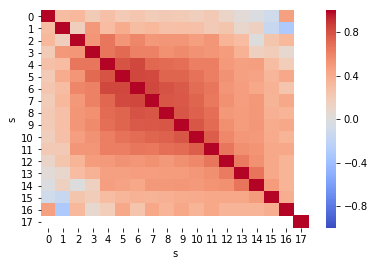

In [14]:
sns.heatmap(df_corr_kendall, 
            xticklabels=df_corr_kendall.columns.values,
            yticklabels=df_corr_kendall.columns.values,
            vmin=-1, cmap='coolwarm')

## Max

In [16]:
df = pd.read_csv('parallel_merge_max.csv',
                 names=['k','node','number_influenced','s'])
df.head()

,k,node,number_influenced,s
0,0,9,1,0
1,0,9,8,1
2,1,9,39,1
3,2,9,44,1
4,0,9,282,2


In [17]:
df_k_max = select_max_k(df)
df_k_max.head()

,node,number_influenced,s
0,9,1,0
3,9,44,1
6,9,474,2
10,9,6074,3
13,9,13172,4


In [18]:
df_to_corr = generate_pivot_df(df_k_max)
df_to_corr.head()

s,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,44,474,6074,13172,17633,18232,18374,18453,18468,18470.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,17,146,2561,8217,16158,17970,18365,18441,18469,18470.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,3,468,3829,10768,15801,17935,18295,18444,18462,18464.0,18470.0,18470.0,NaN,NaN,NaN,NaN,NaN
0,1,2,32,335,4883,8633,15114,17540,18244,18409,18460.0,18463.0,18470.0,18470.0,NaN,NaN,NaN,NaN
0,1,2,107,135,1569,6434,15813,17786,18334,18420,18454.0,18467.0,18469.0,18470.0,NaN,NaN,NaN,NaN


In [19]:
df_corr_kendall = df_to_corr.corr(method='kendall')
df_corr_kendall

s,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
s,,,,,,,,,,,,,,,,,,
0,1.000000,0.257606,0.129217,0.142264,0.136419,0.136747,0.123200,0.122145,0.115080,0.110205,0.108366,0.045198,-0.012172,-0.013522,0.008365,-0.313183,0.158114,NaN
1,0.257606,1.000000,0.435652,0.587629,0.474836,0.512635,0.427492,0.432394,0.393597,0.392320,0.385723,0.296418,0.205789,0.045468,0.112703,0.018135,0.123091,NaN
2,0.129217,0.435652,1.000000,0.700654,0.743089,0.651637,0.667479,0.611827,0.599410,0.598042,0.551014,0.571976,0.391546,0.098662,-0.160616,0.195297,0.252646,NaN
3,0.142264,0.587629,0.700654,1.000000,0.762008,0.747800,0.660747,0.637283,0.583340,0.587097,0.552534,0.542770,0.514932,0.338543,-0.072948,0.183845,0.000000,NaN
4,0.136419,0.474836,0.743089,0.762008,1.000000,0.825841,0.822491,0.721588,0.696140,0.676832,0.613364,0.598968,0.509653,0.482833,0.388480,0.289894,0.284268,NaN
5,0.136747,0.512635,0.651637,0.747800,0.825841,1.000000,0.857282,0.834166,0.743125,0.732752,0.676658,0.617975,0.528770,0.473880,0.547156,0.369951,0.426401,NaN
6,0.123200,0.427492,0.667479,0.660747,0.822491,0.857282,1.000000,0.859154,0.810176,0.772162,0.702465,0.656377,0.523537,0.482225,0.463374,0.382117,0.423207,NaN
7,0.122145,0.432394,0.611827,0.637283,0.721588,0.834166,0.859154,1.000000,0.814503,0.791827,0.745326,0.663213,0.537258,0.480788,0.491116,0.368306,0.423207,NaN
8,0.115080,0.393597,0.599410,0.583340,0.696140,0.743125,0.810176,0.814503,1.000000,0.807665,0.754532,0.697093,0.520733,0.489548,0.480897,0.396849,0.352673,NaN


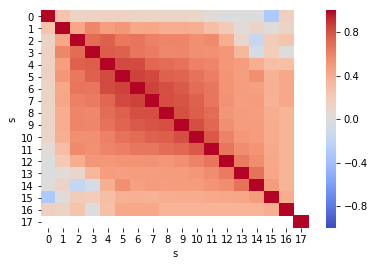

In [20]:
sns.heatmap(df_corr_kendall, 
            xticklabels=df_corr_kendall.columns.values,
            yticklabels=df_corr_kendall.columns.values,
            vmin=-1, cmap='coolwarm')

## Random

In [22]:
df = pd.read_csv('parallel_merge_random_2_rt_pol.csv',
                 names=['k','node','number_influenced','s'])
df.head()

,k,node,number_influenced,s
0,0,9,1,0
1,0,9,8,1
2,1,9,59,1
3,2,9,91,1
4,3,9,104,1


In [24]:
df_k_max = select_max_k(df)
df_k_max.head()

,node,number_influenced,s
0,9,1,0
6,9,111,1
12,9,616,2
18,9,6214,3
21,9,12972,4


In [25]:
df_to_corr = generate_pivot_df(df_k_max)
df_to_corr.head()

s,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,111,616,6214,12972,17564,18227,18375,18453,18468,18470.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,2,1041,3310,11416,15273,17902,18269,18412,18461,18469.0,18470.0,NaN,NaN,NaN,NaN,NaN,NaN
0,1,5,715,3827,10537,15732,17908,18288,18442,18462,18464.0,18470.0,18470.0,NaN,NaN,NaN,NaN,NaN
0,1,2,820,1779,7430,13591,17614,18261,18389,18457,18468.0,18470.0,NaN,NaN,NaN,NaN,NaN,NaN
0,2,29,616,4788,9382,15713,17737,18258,18411,18461,18469.0,18470.0,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df_corr_kendall = df_to_corr.corr(method='kendall')
df_corr_kendall

s,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
s,,,,,,,,,,,,,,,,,,
0,1.000000,0.228381,0.111133,0.116116,0.112794,0.107877,0.097671,0.091266,0.091579,0.076823,0.080118,0.010354,-0.055942,0.036716,0.064550,-0.002079,0.083333,NaN
1,0.228381,1.000000,0.414700,0.593446,0.457671,0.501998,0.417773,0.417551,0.375245,0.375622,0.368734,0.279969,0.211054,0.047655,0.160979,0.000000,0.123091,NaN
2,0.111133,0.414700,1.000000,0.699560,0.764662,0.669516,0.684906,0.621980,0.611494,0.606000,0.556858,0.579244,0.407807,0.127355,-0.159365,0.199839,0.252646,NaN
3,0.116116,0.593446,0.699560,1.000000,0.752264,0.750089,0.662725,0.632015,0.573353,0.581435,0.544699,0.534801,0.518321,0.348523,-0.051026,0.188455,0.000000,NaN
4,0.112794,0.457671,0.764662,0.752264,1.000000,0.834520,0.834549,0.727958,0.702670,0.683810,0.618136,0.603706,0.507184,0.483919,0.405408,0.298849,0.286446,NaN
5,0.107877,0.501998,0.669516,0.750089,0.834520,1.000000,0.867106,0.830684,0.743635,0.732924,0.674441,0.617616,0.529930,0.471077,0.546082,0.378404,0.426401,NaN
6,0.097671,0.417773,0.684906,0.662725,0.834549,0.867106,1.000000,0.859084,0.806518,0.771004,0.698463,0.653120,0.524095,0.483213,0.460503,0.372181,0.423207,NaN
7,0.091266,0.417551,0.621980,0.632015,0.727958,0.830684,0.859084,1.000000,0.818995,0.793549,0.741611,0.663135,0.537043,0.480747,0.497530,0.369226,0.423207,NaN
8,0.091579,0.375245,0.611494,0.573353,0.702670,0.743635,0.806518,0.818995,1.000000,0.806223,0.756105,0.694188,0.520705,0.489898,0.499782,0.367385,0.352673,NaN


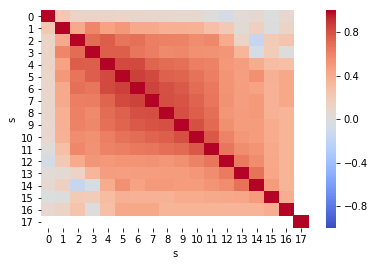

In [27]:
sns.heatmap(df_corr_kendall, 
            xticklabels=df_corr_kendall.columns.values,
            yticklabels=df_corr_kendall.columns.values,
            vmin=-1, cmap='coolwarm')